In [147]:
import os
import sys
import pdb
import copy
import importlib
import numpy as np
import xarray as xr
import cmasher as cmr
from time import sleep
import matplotlib as mpl
from matplotlib import rc
from datetime import datetime
from matplotlib import gridspec
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap as date
from matplotlib.dates import DateFormatter

plt.rcParams.update({
    'font.size'       : 14,   # Base font size
    'axes.labelsize'  : 14,   # Axis labels
    'xtick.labelsize' : 13,   # X-axis tick labels
    'ytick.labelsize' : 13,   # Y-axis tick labels
    'legend.fontsize' : 12,   # Legend font size
    'figure.titlesize': 16    # Figure title size
})
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
#mpl.rc('text', usetex = True)
#mpl.rc('font', family = 'serif')

plt.ioff()

sys.path.insert(1, '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC')
import plotting_utils as putil
import compute_ensemble_stats as ces
importlib.reload(putil)
importlib.reload(ces)

<module 'compute_ensemble_stats' from '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC/compute_ensemble_stats.py'>

In [62]:
importlib.reload(putil)
importlib.reload(ces)

# ------ midlatitude average

freq='monthly'
pmin, pmax = 30, 600
c2ppbd = 1e9 * (24*60*60) # kg/kg/s to ppb/day

# ----- NH
latmin, latmax = 20, 40
vargs = {'skip_nosrctag':True, 'freq':freq,
         'latmin':latmin, 'latmax':latmax, 'pmin':pmin, 'pmax':pmax,
         'average_lat':True, 'average_time':False, 'average_pres':False}

dqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='e90')
dqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='e90')
dqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='e90')
dqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='e90')
dqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='e90')
dqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='e90')
e90  = putil.get_variable('E90j', **vargs, mass=10)
e90tend = putil.get_variable('E90TEND', **vargs, mass=10)

# ----- eq
latmin, latmax = -5, 5
vargs = {'skip_nosrctag':True, 'freq':freq,
         'latmin':latmin, 'latmax':latmax, 'pmin':pmin, 'pmax':pmax,
         'average_lat':True, 'average_time':False, 'average_pres':False}

pe90  = putil.get_variable('E90j', **vargs, mass=10)
pe90tend = putil.get_variable('E90TEND', **vargs, mass=10)
pdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='e90')
pdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='e90')
pdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='e90')
pdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='e90')
pdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='e90')
pdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='e90')

# ----- global at Jan 1992
vargs = {'skip_nosrctag':True, 'freq':freq,
         'pmin':pmin, 'pmax':pmax, 'tmin':date(1992,1,1), 'tmax':date(1992,2,1),
         'average_time':True, 'average_pres':False}

ge90  = putil.get_variable('E90j', **vargs, mass=10)
ge90tend = putil.get_variable('E90TEND', **vargs, mass=10)
gdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='e90')
gdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='e90')
gdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='e90')
gdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='e90')
gdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='e90')
gdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='e90')
gtrop = putil.get_variable('TROP_P', **vargs, mass=10)

# ----- global at July 1992
vargs = {'skip_nosrctag':True, 'freq':freq,
         'pmin':pmin, 'pmax':pmax, 'tmin':date(1992,7,1), 'tmax':date(1992,8,1),
         'average_time':True, 'average_pres':False}

gse90  = putil.get_variable('E90j', **vargs, mass=10)
gse90tend = putil.get_variable('E90TEND', **vargs, mass=10)
gsdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='e90')
gsdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='e90')
gsdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='e90')
gsdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='e90')
gsdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='e90')
gsdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='e90')
gstrop = putil.get_variable('TROP_P', **vargs, mass=10)


# ----- global at average
vargs = {'skip_nosrctag':True, 'freq':freq,
         'pmin':pmin, 'pmax':pmax, 'tmin':date(1994,1,1), 'tmax':date(1999,1,1),
         'average_time':True, 'average_pres':False}

gce90  = putil.get_variable('E90j', **vargs, mass=10)
gce90tend = putil.get_variable('E90TEND', **vargs, mass=10)
gcdqdt = putil.get_variable('qtendtotal', **vargs, mass=10, q='e90')
gcdqdt_sink = putil.get_variable('qtendsink', **vargs, mass=10, q='e90')
gcdqdt_source = putil.get_variable('qtendsource', **vargs, mass=10, q='e90')
gcdqdt_etfd = putil.get_variable('qtendetfd', **vargs, mass=10, q='e90')
gcdqdt_resvel = putil.get_variable('qtendresvel', **vargs, mass=10, q='e90')
gcdqdt_diff = putil.get_variable('qtenddiff', **vargs, mass=10, q='e90')
gctrop = putil.get_variable('TROP_P', **vargs, mass=10)


# ---- dims
time = [datetime(t.year, t.month, t.day) for t in e90['cfmean'].time.values]
plev = e90['cfmean'].plev


-------- processing ensemble zonal mean data...
merging data
ensemble members found: 15
doing latitude slicing and averaging...
doing vertical slicing and averaging...
data shape after member concat and slicing: (15, 32, 91)
cf shape after member concat and slicing: (15, 32, 91)
getting impact
getting data ensemble mean
getting cf ensemble mean
getting impact ensemble mean
getting ttest
getting coherence
done

-------- processing TEM data for tracer 2...
merging tem data
tem data shape after member concat: (15, 180, 72, 91)
tem cf shape after member concat: (15, 180, 72, 92)
doing latitude slicing and averaging...
doing vertical slicing and averaging...
tem data shape after member concat and slicing: (15, 32, 91)
tem cf shape after member concat: and slicing (15, 32, 91)
getting tem impact
getting tem ensemble mean
getting tem cf ensemble mean
getting tem impact ensemble mean
getting ttest
getting coherence
done

-------- processing TEM budget data for tracer 2...
doing slicing and av

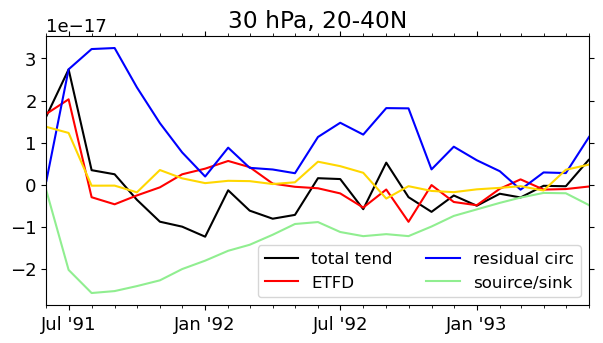

In [70]:
fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

# -------- 30 hPa

pp = 30
ax.plot(time, dqdt['impact'].sel(plev=pp, method='nearest'), '-k', label='total tend')
ax.plot(time, dqdt_etfd['impact'].sel(plev=pp, method='nearest'), '-r', label='ETFD')
ax.plot(time, dqdt_resvel['impact'].sel(plev=pp, method='nearest'), '-b', label='residual circ')
ax.plot(time, dqdt_diff['impact'].sel(plev=pp, method='nearest'), color='gold')
ax.plot(time, (dqdt_source['impact'] + dqdt_sink['impact']).sel(plev=pp, method='nearest'), color='lightgreen', label='souirce/sink')
ax.set_xlim([datetime(1991,6,1), datetime(1993,6,1)])
ax.legend(loc='lower right', ncol=2)
putil.format_ticks(ax)
putil.season_timeticks(ax, option='solstice', times=time, include_year=True)
ax.set_title('{} hPa, 20-40N'.format(pp))

plt.show()

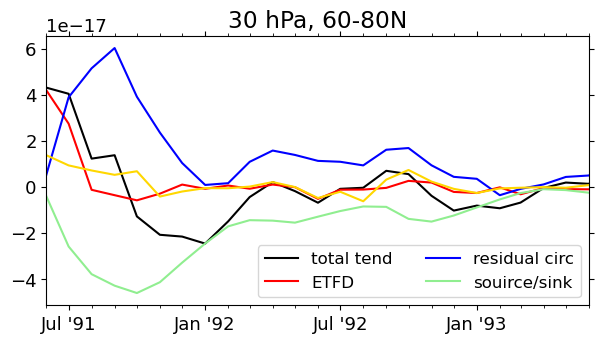

In [71]:
# -------- 30 hPa
fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)
pp = 30
ax.plot(time, pdqdt['impact'].sel(plev=pp, method='nearest'), '-k', label='total tend')
ax.plot(time, pdqdt_etfd['impact'].sel(plev=pp, method='nearest'), '-r', label='ETFD')
ax.plot(time, pdqdt_resvel['impact'].sel(plev=pp, method='nearest'), '-b', label='residual circ')
ax.plot(time, pdqdt_diff['impact'].sel(plev=pp, method='nearest'), color='gold')
ax.plot(time, (pdqdt_source['impact'] + pdqdt_sink['impact']).sel(plev=pp, method='nearest'), color='lightgreen', label='souirce/sink')
ax.set_xlim([datetime(1991,6,1), datetime(1993,6,1)])
ax.legend(loc='lower right', ncol=2)
putil.format_ticks(ax)
putil.season_timeticks(ax, option='solstice', times=time, include_year=True)
ax.set_title('{} hPa, 60-80N'.format(pp))

# -------- 10 hPa

plt.show()

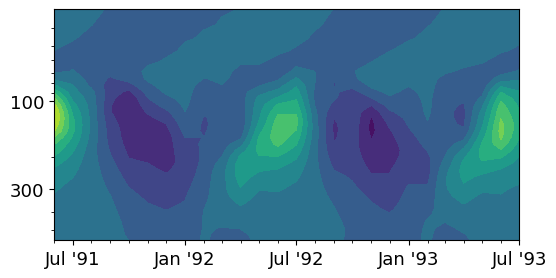

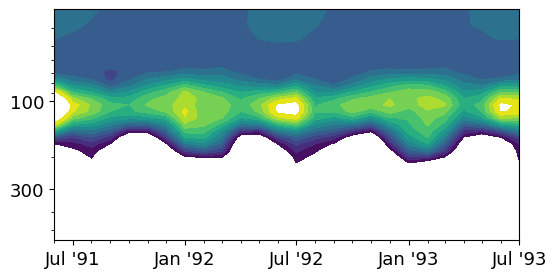

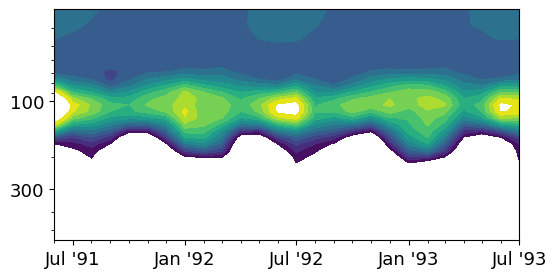

In [65]:
#e90TEND = {}
#e90TEND['cfmean'] = dqdt['cfmean'] + dqdt_diff['cfmean']
#e90TEND['impact'] = dqdt['impact'] + dqdt_diff['impact']
plev = e90tend['cfmean'].plev

plt.figure(figsize=(6,3))
e90cf = plt.contourf(time, plev, e90tend['cfmean']*c2ppbd, levels=10)
putil.format_paxis(plt.gca())
plt.xlim([datetime(1991,6,1), datetime(1993,7,1)])
putil.season_timeticks(plt.gca(), time, 'solstice', include_year=True)

plt.figure(figsize=(6,3))
plt.contourf(time, plev, dqdt['cfmean']*c2ppbd, levels=e90cf.levels)
putil.format_paxis(plt.gca())
plt.xlim([datetime(1991,6,1), datetime(1993,7,1)])
putil.season_timeticks(plt.gca(), time, 'solstice', include_year=True)

plt.figure(figsize=(6,3))
plt.contourf(time, plev, dqdt['cfmean']*c2ppbd - dqdt_source['cfmean']*c2ppbd, levels=e90cf.levels)
putil.format_paxis(plt.gca())
plt.xlim([datetime(1991,6,1), datetime(1993,7,1)])
putil.season_timeticks(plt.gca(), time, 'solstice', include_year=True)

plt.show()

In [66]:
gcf.levels

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])

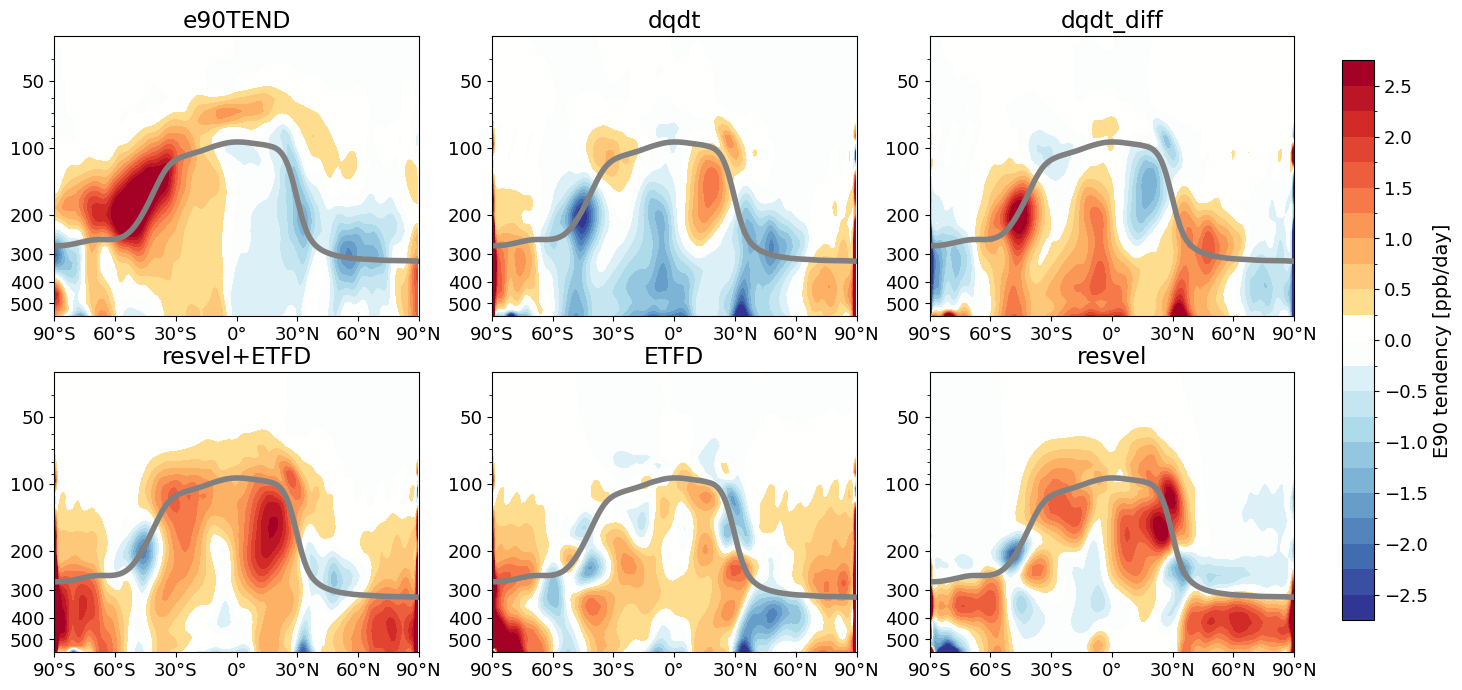

In [148]:
levels = np.arange(-2.5, 2.6, 0.25)
norm = putil.get_cmap_norm(levels, 'uneven')
cmap = putil.give_cmap_white_center('RdYlBu_r')
lat, trop, tcol, tlw = ge90['cfmean'].lat, gtrop['cfmean']/100, 'grey', 4
latticks = [-90, -60, -30, 0, 30, 60, 90]
pticks=[500, 400, 300, 200, 100, 50]

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# --- measured e90TEND
ax1.contourf(ge90['cfmean'].lat, ge90['cfmean'].plev, ge90tend['cfmean'].T*c2ppbd*10, levels=levels, norm=norm, cmap=cmap, extend='both')
ax1.set_title('e90TEND')

# ---- resvel+ETFD
ax4.contourf(ge90['cfmean'].lat, ge90['cfmean'].plev, gdqdt_resvel['cfmean'].T*c2ppbd + gdqdt_etfd['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax4.set_title('resvel+ETFD')

# --- cumulative tendency
gcf = ax2.contourf(ge90['cfmean'].lat, ge90['cfmean'].plev, gdqdt['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax2.set_title('dqdt')

# ---- difference
ax3.contourf(ge90['cfmean'].lat, ge90['cfmean'].plev, gdqdt_diff['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax3.set_title('dqdt_diff')

# ---- etfd
ax5.contourf(ge90['cfmean'].lat, ge90['cfmean'].plev, gdqdt_etfd['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax5.set_title('ETFD')

# ---- resvel
ax6.contourf(ge90['cfmean'].lat, ge90['cfmean'].plev, gdqdt_resvel['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax6.set_title('resvel')

# ---- colorbar
cb = plt.colorbar(gcf, cax=fig.add_axes([0.93, 0.15, 0.02, 0.7]), extendrect=True)
cb.set_label('E90 tendency [ppb/day]')
cb.ax.yaxis.set_ticks(levels[levels%0.5==0])

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.plot(lat, trop, color=tcol, lw=tlw)
    putil.format_paxis(ax, ticks=pticks)
    putil.format_lataxis(ax, ticks=latticks)

plt.show()

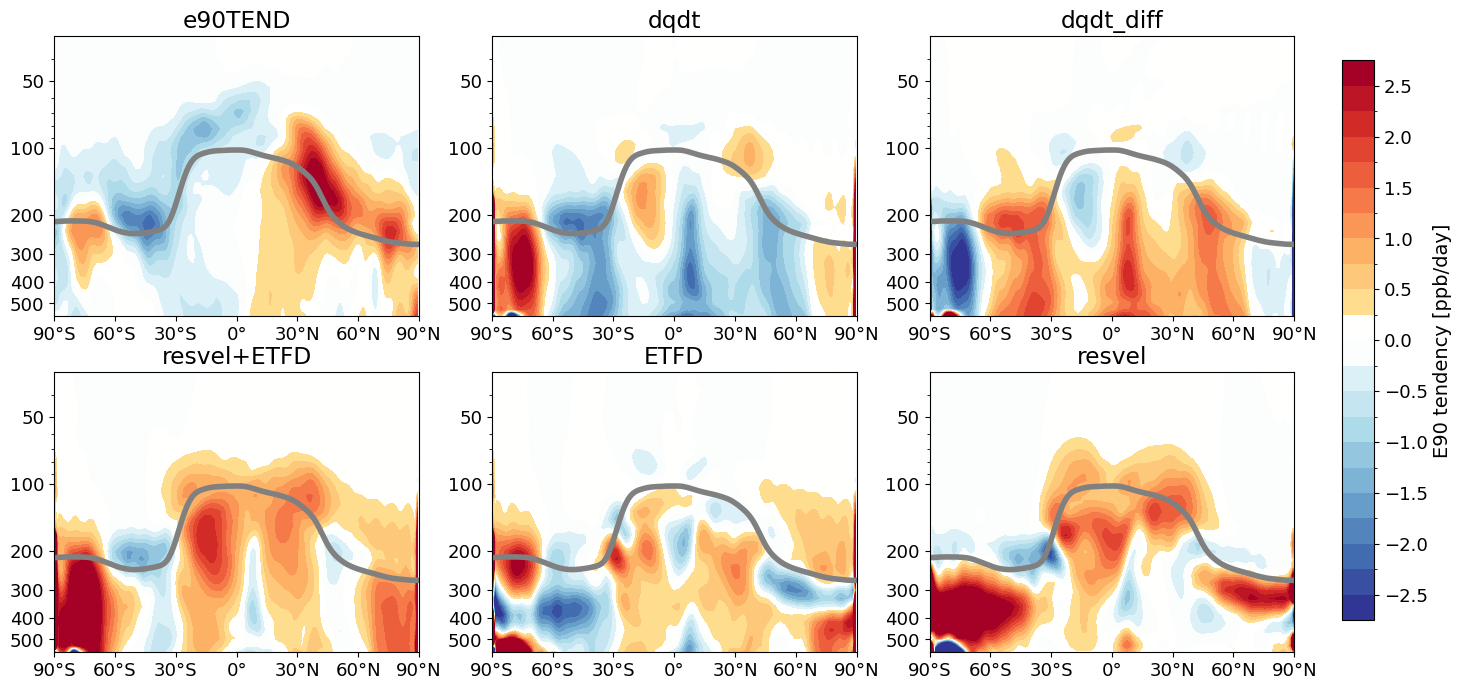

In [149]:
levels = np.arange(-2.5, 2.6, 0.25)
norm = putil.get_cmap_norm(levels, 'uneven')
lat, trop, tcol, tlw = gse90['cfmean'].lat, gstrop['cfmean']/100, 'grey', 4
latticks = [-90, -60, -30, 0, 30, 60, 90]
pticks=[500, 400, 300, 200, 100, 50]

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# --- measured e90TEND
gcf = ax1.contourf(gse90['cfmean'].lat, gse90['cfmean'].plev, gse90tend['cfmean'].T*c2ppbd*10, levels=levels, norm=norm, cmap=cmap, extend='both')
ax1.set_title('e90TEND')

# ---- resvel+ETFD
ax4.contourf(ge90['cfmean'].lat, gse90['cfmean'].plev, gsdqdt_resvel['cfmean'].T*c2ppbd + gsdqdt_etfd['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax4.set_title('resvel+ETFD')

# --- cumulative tendency
ax2.contourf(ge90['cfmean'].lat, gse90['cfmean'].plev, gsdqdt['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax2.set_title('dqdt')

# ---- difference
ax3.contourf(ge90['cfmean'].lat, gse90['cfmean'].plev, gsdqdt_diff['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax3.set_title('dqdt_diff')

# ---- etfd
ax5.contourf(ge90['cfmean'].lat, gse90['cfmean'].plev, gsdqdt_etfd['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax5.set_title('ETFD')

# ---- resvel
ax6.contourf(ge90['cfmean'].lat, gse90['cfmean'].plev, gsdqdt_resvel['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax6.set_title('resvel')

# ---- colorbar
cb = plt.colorbar(gcf, cax=fig.add_axes([0.93, 0.15, 0.02, 0.7]), extendrect=True)
cb.set_label('E90 tendency [ppb/day]')
cb.ax.yaxis.set_ticks(levels[levels%0.5==0])

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.plot(lat, trop, color=tcol, lw=tlw)
    putil.format_paxis(ax, ticks=pticks)
    putil.format_lataxis(ax, ticks=latticks)

plt.show()

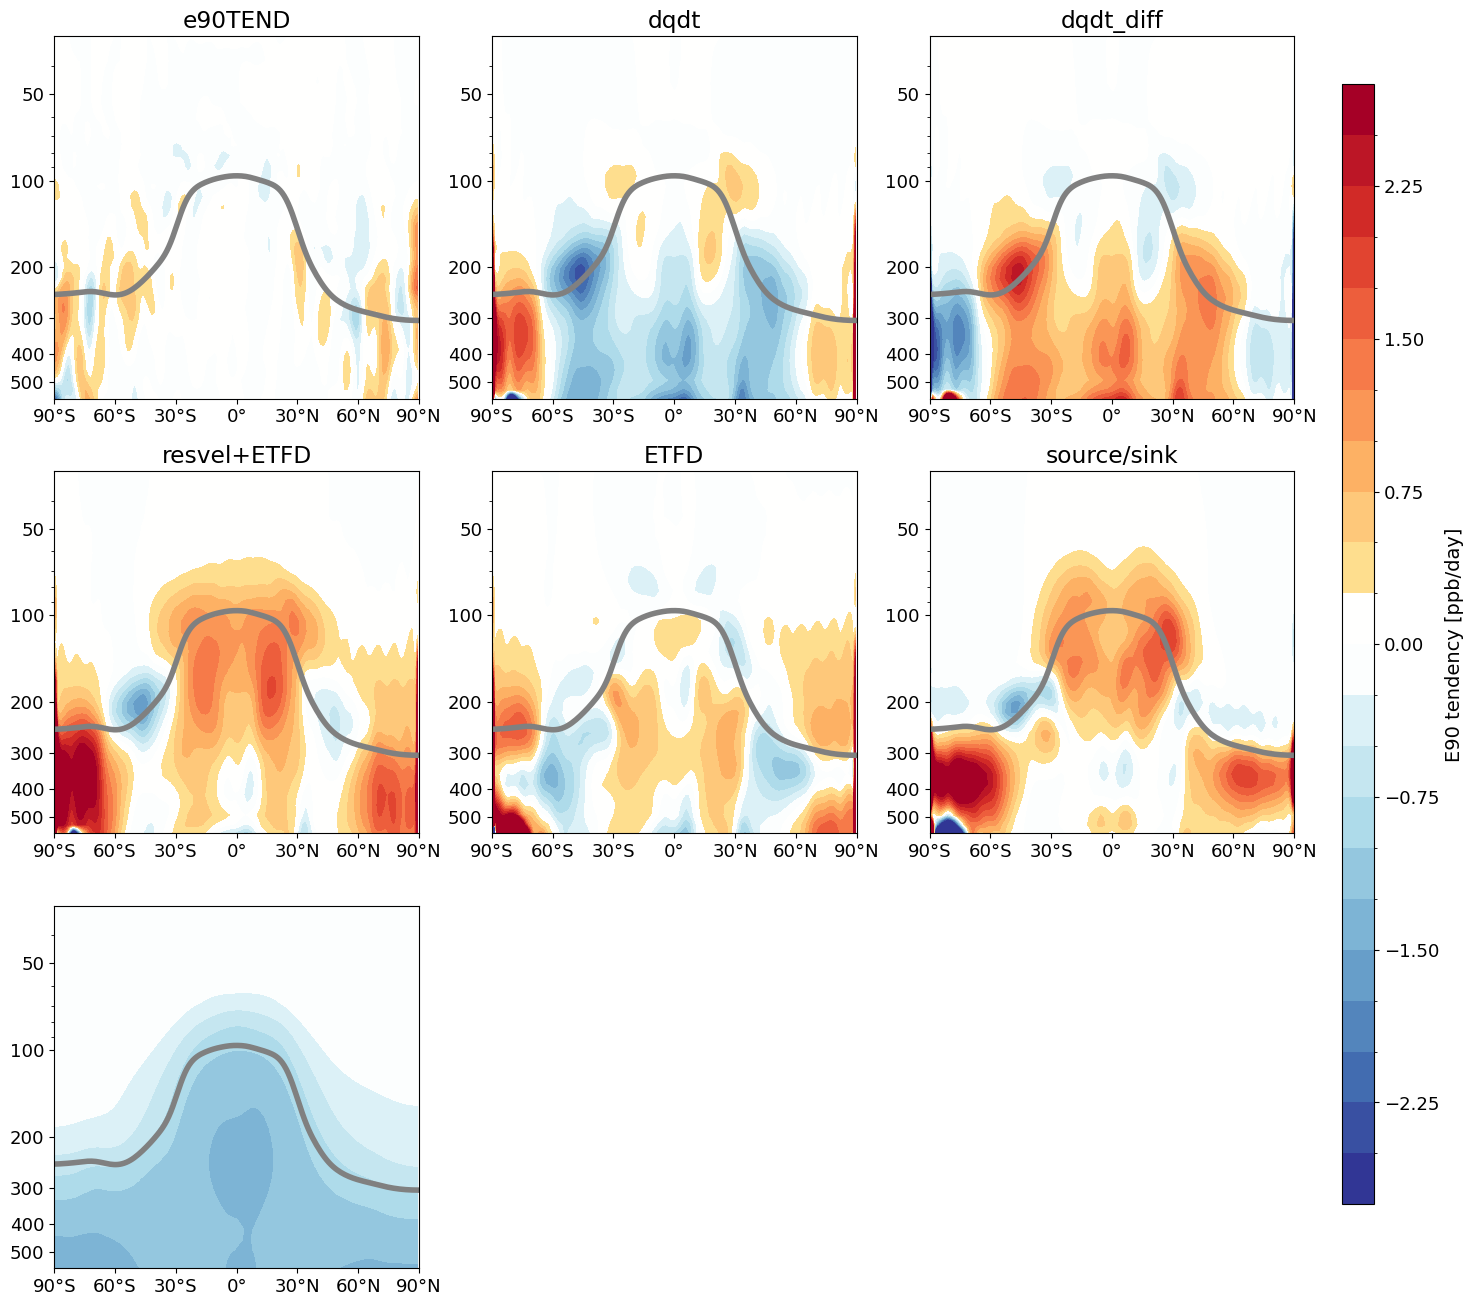

In [152]:
levels = np.arange(-2.5, 2.6, 0.25)
norm = putil.get_cmap_norm(levels, 'uneven')
lat, trop, tcol, tlw = gce90['cfmean'].lat, gctrop['cfmean']/100, 'grey', 4
latticks = [-90, -60, -30, 0, 30, 60, 90]
pticks=[500, 400, 300, 200, 100, 50]

fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)

# --- measured e90TEND
gcf = ax1.contourf(gce90['cfmean'].lat, gce90['cfmean'].plev, gce90tend['cfmean'].T*c2ppbd*100, levels=levels, norm=norm, cmap=cmap, extend='both')
ax1.set_title('e90TEND')

# ---- resvel+ETFD
ax4.contourf(ge90['cfmean'].lat, gce90['cfmean'].plev, gcdqdt_resvel['cfmean'].T*c2ppbd + gcdqdt_etfd['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax4.set_title('resvel+ETFD')

# --- cumulative tendency
ax2.contourf(ge90['cfmean'].lat, gce90['cfmean'].plev, gcdqdt['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax2.set_title('dqdt')

# ---- difference
ax3.contourf(ge90['cfmean'].lat, gce90['cfmean'].plev, gcdqdt_diff['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax3.set_title('dqdt_diff')

# ---- etfd
ax5.contourf(ge90['cfmean'].lat, gce90['cfmean'].plev, gcdqdt_etfd['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax5.set_title('ETFD')

# ---- resvel
ax6.contourf(ge90['cfmean'].lat, gce90['cfmean'].plev, gcdqdt_resvel['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
ax6.set_title('resvel')

# ---- colorbar
cb = plt.colorbar(gcf, cax=fig.add_axes([0.93, 0.15, 0.02, 0.7]), extendrect=True)
cb.set_label('E90 tendency [ppb/day]')
cb.ax.yaxis.set_ticks(levels[levels%0.5==0])

ax7.contourf(ge90['cfmean'].lat, gce90['cfmean'].plev, gcdqdt_source['cfmean'].T*c2ppbd + gcdqdt_sink['cfmean'].T*c2ppbd, levels=levels, norm=norm, cmap=cmap, extend='both')
putil.format_paxis(ax7)
putil.format_lataxis(ax7)
ax6.set_title('source/sink')

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.plot(lat, trop, color=tcol, lw=tlw)
    putil.format_paxis(ax, ticks=pticks)
    putil.format_lataxis(ax, ticks=latticks)

plt.show()